# 03_DefineOpeningDates
---
Feb 06, 2024


## Import packages

In [1]:
%load_ext autoreload
%autoreload 2

from common_imports import *

## Specify path to data files

In [2]:
# path to files for data in SBS region
#=========================================
open_area_file = './data/SBS_open_area_v4.nc'
ice_drift_file = './data/SBS_PPD_icedrift.nc'
wind_file = './data/SBS_ERA5_hourly.nc'
#=========================================

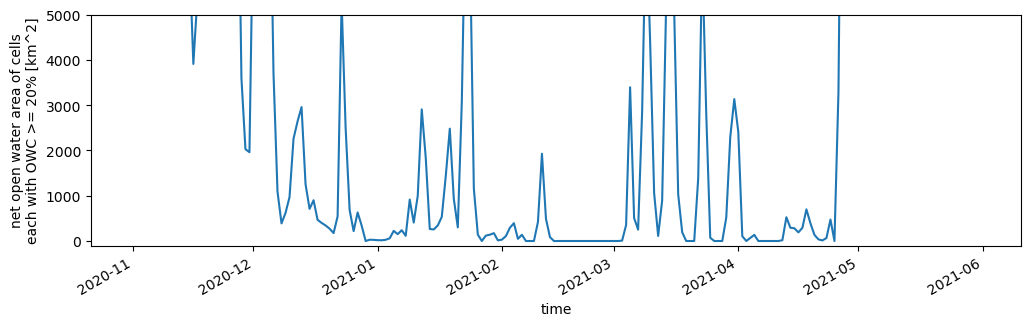

In [6]:

fig, ax = plt.subplots(figsize=(12,3))

ds_open = xr.open_dataset(open_area_file)
ds_open.close()

ds_open.oa_g20.plot(ax=ax)
ax.set_ylim(-100,5000)

start_date = pd.to_datetime(ds_open.time[0].values)
end_date = pd.to_datetime(ds_open.time[-1].values)

# open data
dsERA5 = xr.open_dataset(wind_file)
dsERA5.close()
wind_speed = np.sqrt(dsERA5.u.values**2+dsERA5.v.values**2)


# open data
ds_PPD = xr.open_dataset(ice_drift_file)
ds_PPD.close()
PPD_time = ds_PPD.time.values
width = PPD_time[1]-PPD_time[0]
ice_speed = np.sqrt(ds_PPD.u.values**2+ds_PPD.v.values**2)

# # ax2 = ax.twinx()
# # ax2.invert_yaxis()
# # ax2.set_ylim(20,-100)
# # ds_PPD.u.plot(ax=ax2, color='orange')
# # # ax2.plot(ds_PPD.time,ice_speed)

consolidated season (A<1000 km2): 2020-12-20 00:00:00 -- 2021-04-25 00:00:00
>>> save as: ./figures/CoastOpen_11.01_05.31_v5.png


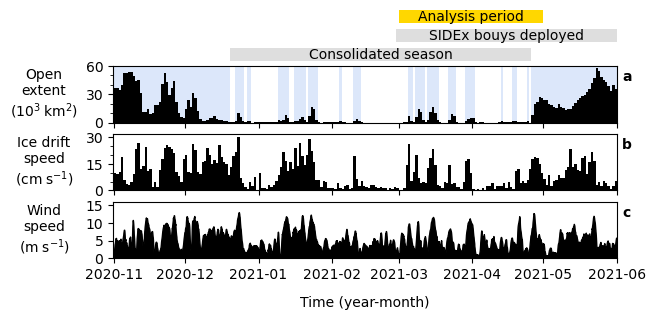

In [8]:
import matplotlib.patches as patches 


fig, axs = plt.subplots(3,1, figsize=(6.5,2.5))
FS = 10


#//////////////////
# opening area ///
#/////////////////////////////////////////////////////////////////////////////////////
#----------
ax = axs[0]
#----------
# label panel
ax.text(1.02, 0.8, 'a', fontsize=FS, weight='bold', 
        color='black',bbox=dict(facecolor='None', alpha=0.8,edgecolor='None', boxstyle='round,pad=0.15'), 
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, zorder=100)

# open data
icearea_time = pd.to_datetime(ds_open.time.values)
area = (ds_open.ext_g20.values)/(1000)
wide_open = area > 1
opening = np.diff(area) > 0

# find when ice is open, opening, and closed
close_time = np.array([])
for tt in range(1,len(icearea_time)):
    if not wide_open[tt]:
        close_time = np.append(close_time, icearea_time[tt])
        
# plot params
Ti = icearea_time[0] - timedelta(days=0.25)
Tf = icearea_time[-1] + timedelta(days=1)
ax.set_xlim(Ti,Tf)
ax.set_ylim(0,60)
ax.yaxis.set_major_locator(plt.MultipleLocator(30))
ax.yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('Open\nextent\n($\mathrm{10^{3}\; km^{2}}$)', fontsize=FS, rotation=0, labelpad=30, verticalalignment='center')
     
# bar plot
width = icearea_time[1]-icearea_time[0]
ax.bar(icearea_time + timedelta(hours=12), area, width=width, color='k')

# highlight open sequences
h_color = 'cornflowerblue'
h_alpha = 0.225
for tt in range(1,len(icearea_time)-1):
    if (wide_open[tt] == True):
        ax.fill_between([icearea_time[tt], icearea_time[tt+1]], ax.get_ylim()[0], ax.get_ylim()[-1], 
                        color=h_color, edgecolor='None', alpha=h_alpha, zorder=-2, clip_on=False)
ax.fill_between([icearea_time[0], icearea_time[1]], ax.get_ylim()[0], ax.get_ylim()[-1], 
                color=h_color, edgecolor='None', alpha=h_alpha, zorder=-2, clip_on=False)
ax.fill_between([icearea_time[-1], icearea_time[-1]+timedelta(hours=24)], ax.get_ylim()[0], ax.get_ylim()[-1], 
                color=h_color, edgecolor='None', alpha=h_alpha, zorder=-2, clip_on=False)

# Label shaded times
#--------------------------
# x1 = icearea_time[-1] + timedelta(days=6) 
# w =  datetime.timedelta(days=6)
# y1 = 15
# rect = patches.Rectangle((x1, y1), w, 15, linewidth=1, edgecolor=h_color, facecolor=h_color, 
#                          alpha=h_alpha, clip_on=False, zorder=1)        
# ax.add_patch(rect)
# ax.text(x1+timedelta(days=8), y1+1, '> $\mathrm{10^{3}\;{km}^{2}}$', horizontalalignment='left',
#         verticalalignment='bottom', clip_on=False, c='k', fontsize=FS)
#/////////////////////////////////////////////////////////////////////////////////////



#////////////////////////
# label time periods ///
#/////////////////////////////////////////////////////////////////////////////////////
print(f'consolidated season (A<1000 km2): {close_time[0]} -- {close_time[-1]}')
#----------
ax = axs[0]
#----------
# Label consolidated period
#--------------------------
x1 = close_time[0]
w = close_time[-1] + timedelta(days=1) - x1
y1 = 70
rect = patches.Rectangle((x1, y1-5), w, 14, linewidth=1, edgecolor='none', facecolor='lightgray', 
                         alpha=0.75, clip_on=False, zorder=1)        
ax.add_patch(rect)
ax.text(x1+w/2, y1+2, 'Consolidated season', horizontalalignment='center',
        verticalalignment='center', clip_on=False, c='k', fontsize=FS)

# Label SIDEx period
#--------------------------
x1 = datetime(year=2021, month=2, day=28)
w = datetime(year=2021, month=6, day=1) - x1
y1 = 90
rect = patches.Rectangle((x1, y1-5), w, 14, linewidth=1, edgecolor='none', facecolor='lightgray', 
                         alpha=0.75, clip_on=False, zorder=1)        
ax.add_patch(rect)
ax.text(x1+w/2, y1+2, 'SIDEx bouys deployed', horizontalalignment='center',
        verticalalignment='center', clip_on=False, c='k', fontsize=FS)

# Label analysis period
#--------------------------
x1 = datetime(year=2021, month=3, day=1)
w = datetime(year=2021, month=5, day=1) - x1
y1 = 110
rect = patches.Rectangle((x1, y1-5), w, 14, linewidth=1, edgecolor='none', facecolor='gold', 
                         alpha=1, clip_on=False, zorder=1)        
ax.add_patch(rect)
ax.text(x1+w/2, y1+2, 'Analysis period', horizontalalignment='center',
        verticalalignment='center', clip_on=False, c='k', fontsize=FS)

#/////////////////////////////////////////////////////////////////////////////////////


#/////////////////////////
# satellite ice drift ///
#/////////////////////////////////////////////////////////////////////////////////////
#----------
ax = axs[1]
#----------
# label panel
ax.text(1.02, 0.8, 'b', fontsize=FS, weight='bold', 
        color='black',bbox=dict(facecolor='none', alpha=0.8,edgecolor='None', boxstyle='round,pad=0.15'), 
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, zorder=100)



# plot
ax.bar(ds_PPD.time.values, ice_speed, width=width, color='k')

# plot params
ax.set_xlim(Ti,Tf)
ax.set_ylim(0,32)
ax.yaxis.set_major_locator(plt.MultipleLocator(15))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel('Ice drift\nspeed\n($\mathrm{cm\; s^{-1}}$)', fontsize=FS, rotation=0, labelpad=30, verticalalignment='center')
#/////////////////////////////////////////////////////////////////////////////////////


#////////////////
# wind speed ///
#/////////////////////////////////////////////////////////////////////////////////////
#----------
ax = axs[2]
#----------
# label panel
ax.text(1.02, 0.8, 'c', fontsize=FS, weight='bold', 
        color='black',bbox=dict(facecolor='None', alpha=0.8,edgecolor='None', boxstyle='round,pad=0.15'), 
        horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, zorder=100)

# plot
ax.fill_between(dsERA5.time.values, 0, wind_speed, color='k')

# plot params
ax.set_xlim(Ti,Tf)
ax.set_ylim(0,16)
ax.yaxis.set_major_locator(plt.MultipleLocator(5))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.set_ylabel('Wind\nspeed\n($\mathrm{m\; s^{-1}}$)', fontsize=FS, rotation=0, labelpad=30, verticalalignment='center')
ax.set_xlabel('Time (year-month)', fontsize=FS, labelpad=10);
#/////////////////////////////////////////////////////////////////////////////////////

# save figure
# ------------ 
# savename = f"./figures/CoastOpen_{start_date.strftime('%m.%d')}_{end_date.strftime('%m.%d')}_v5.png"
# print(f'>>> save as: {savename}')
# fig.savefig(savename, 
#             transparent=False, bbox_inches="tight", pad_inches = 0.05, dpi=300)


In [6]:


ds_2 = xr.open_dataset(open_area_file).sel(time=slice('2020-12-20T00:00:00.000000000', '2021-04-25T00:00:00.000000000'))
dates = pd.to_datetime(ds_2.time.values)

# open "open area" nc file
# 80% threshold, A = 200 km2, dA/dt > 0
#---------------------------------------
# find date when there are new wide openings
wide_opening_dates = pd.to_datetime(dates[ds_2.N_oa_g20.values > 1000].values)
consolidated_dates = pd.to_datetime(dates[ds_2.N_oa_g20.values <= 1000].values)
new_opening_dates = pd.to_datetime(dates[ds_2.N_oa_g20.values > 0].values)

        
# partition into opening sequences  
#---------------------------------
break_sequences={}
# fill in first value of list
ss = 0
break_sequences[ss] = [wide_opening_dates[0]]
for ii in range(1,len(wide_opening_dates)):
    # number hours difference between last time in current sequence and current time
    dh = pd.Timedelta(wide_opening_dates[ii]-break_sequences[ss][-1]).total_seconds()/3600
    # if within 24 hour of last timein sequence, add to current sequence
    if dh <= 24:
        break_sequences[ss].append(wide_opening_dates[ii])
    # else start new sequence
    else:
        ss+=1
        break_sequences[ss] = [wide_opening_dates[ii]]
        
print(f'{len(break_sequences)} opening sequences\n--------------------')
for seq in break_sequences:
    print(f'{break_sequences[seq][0]} -- {break_sequences[seq][-1]}  ({len(break_sequences[seq])} days)')

print()
    
# partition into compact sequences  
#---------------------------------
compact_sequences={}
# fill in first value of list
ss = 0
compact_sequences[ss] = [consolidated_dates[0]]
for ii in range(1,len(consolidated_dates)):
    # number hours difference between last time in current sequence and current time
    dh = pd.Timedelta(consolidated_dates[ii]-compact_sequences[ss][-1]).total_seconds()/3600
    # if within 24 hour of last timein sequence, add to current sequence
    if dh <= 24:
        compact_sequences[ss].append(consolidated_dates[ii])
    # else start new sequence
    else:
        ss+=1
        compact_sequences[ss] = [consolidated_dates[ii]]
        
print(f'{len(compact_sequences)} compact sequences\n--------------------')
for seq in compact_sequences:
    print(f'{compact_sequences[seq][0]} -- {compact_sequences[seq][-1]}  ({len(compact_sequences[seq])} days)')
    


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
ds = ds_open.sel(time=slice('2021-02-28T00:00:00.000000000', '2021-05-01T00:00:00.000000000'))

n_g20 = ds.N_oa_g20.values
oa_ = ds.oa.values # - 442.19000000000005
oa_inc_g20_ = ds.noa_inc.values
doa_ = ds.doa.values
oa_g20_ = ds.oa_g20.values
dates = ds.time.values

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(12,5))

axs[0].set_xlim(dates[0], dates[-1])
axs[0].bar(dates, ds.oa_g20, color='lightgray')
# cond = (ds.oa_g20[1:]>200)
# axs[0].bar(dates[1:][cond], ds.oa_g20[1:][cond], facecolor='none', edgecolor='b')
cond = (ds.oa_g20>200)&(ds.doa.values>0)#(np.diff(oa_g20_)>0)#(np.diff(oa_abv20)>0)
axs[0].bar(dates[cond], ds.oa_g20[cond], lw=1.5, facecolor='none', edgecolor='k')
axs[0].set_ylim(-500,9000)

axs[1].set_xlim(dates[0], dates[-1])
cond = (ds.oa_g20>200)&(ds.doa.values>0)#(ds.noa_inc>1000)#(np.diff(oa_abv20)>0)
# axs[1].hlines(-)
axs[1].bar(dates, ds.doa.values, facecolor='lightgray', edgecolor='none')
axs[1].bar(dates[cond], ds.doa.values[cond], facecolor='lightgray', edgecolor='blue')
axs[1].set_ylim(-7000,11000)

axs[2].set_xlim(dates[0], dates[-1])
axs[2].bar(dates, n_g20, color='lightgray')
cond = (n_g20[1:]>1000)&(np.diff(n_g20)>0)#(np.diff(oa_abv20)>0)
axs[2].bar(dates[1:][cond], n_g20[1:][cond], facecolor='none', edgecolor='k')
axs[2].set_ylim(-500,10000)